# Part 3: Spatial operations on geometries

Previously, in <a href="./part1_introduction_what_is_geometry.ipynb">Part 1</a> of this guide series to `arcgis.geometry` module, you have seen the introduction to the module and some foundational concepts. In <a href="part2_working_with_geometries.ipynb">Part 2</a>, you learned how to create geometry objects, their properties, and how to work with one, including its interactions with map widgets.  In this part, let's continue to explore  spatial operations of geometry objects using two different usage patterns.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Spatial-Operations" data-toc-modified-id="Spatial-Operations-1">Spatial Operations</a></span><ul class="toc-item"><li><span><a href="#Two-patterns-of-applying-spatial-operations" data-toc-modified-id="Two-patterns-of-applying-spatial-operations-1.1">Two patterns of applying spatial operations</a></span></li><li><span><a href="#a.-OOP-Pattern" data-toc-modified-id="a.-OOP-Pattern-1.2">a. OOP Pattern</a></span><ul class="toc-item"><li><span><a href="#a1.-Union" data-toc-modified-id="a1.-Union-1.2.1">a1. Union</a></span></li><li><span><a href="#a2.-Difference" data-toc-modified-id="a2.-Difference-1.2.2">a2. Difference</a></span></li><li><span><a href="#a3.-Symmetric-difference" data-toc-modified-id="a3.-Symmetric-difference-1.2.3">a3. Symmetric difference</a></span></li><li><span><a href="#a4.-intersect()-V.S.-overlaps()" data-toc-modified-id="a4.-intersect()-V.S.-overlaps()-1.2.4">a4. intersect() V.S. overlaps()</a></span></li><li><span><a href="#a5.-Equals" data-toc-modified-id="a5.-Equals-1.2.5">a5. Equals</a></span></li><li><span><a href="#a6.-generalize()-V.S.-buffer()" data-toc-modified-id="a6.-generalize()-V.S.-buffer()-1.2.6">a6. generalize() V.S. buffer()</a></span></li><li><span><a href="#a7.-Find-the-nearest-point" data-toc-modified-id="a7.-Find-the-nearest-point-1.2.7">a7. Find the nearest point</a></span></li><li><span><a href="#a8.-contains()" data-toc-modified-id="a8.-contains()-1.2.8">a8. contains()</a></span></li><li><span><a href="#a9.-Clip-a-geometry-object" data-toc-modified-id="a9.-Clip-a-geometry-object-1.2.9">a9. Clip a geometry object</a></span></li></ul></li><li><span><a href="#b.-Spatial-operations-called-from-arcgis.geometry.functions" data-toc-modified-id="b.-Spatial-operations-called-from-arcgis.geometry.functions-1.3">b. Spatial operations called from <code>arcgis.geometry.functions</code></a></span><ul class="toc-item"><li><span><a href="#b1.-Union" data-toc-modified-id="b1.-Union-1.3.1">b1. Union</a></span></li><li><span><a href="#b2.-intersect()-V.S.-overlaps()" data-toc-modified-id="b2.-intersect()-V.S.-overlaps()-1.3.2">b2. intersect() V.S. overlaps()</a></span></li><li><span><a href="#b3.-Difference" data-toc-modified-id="b3.-Difference-1.3.3">b3. Difference</a></span></li><li><span><a href="#b4.-Symmetric-difference" data-toc-modified-id="b4.-Symmetric-difference-1.3.4">b4. Symmetric difference</a></span></li><li><span><a href="#b5.-Equals" data-toc-modified-id="b5.-Equals-1.3.5">b5. Equals</a></span></li><li><span><a href="#b6.-generalize()-V.S.-buffer()" data-toc-modified-id="b6.-generalize()-V.S.-buffer()-1.3.6">b6. generalize() V.S. buffer()</a></span></li><li><span><a href="#b7.-Distance" data-toc-modified-id="b7.-Distance-1.3.7">b7. Distance</a></span></li><li><span><a href="#b8.-Determine-the-spatial-relation-between-two-geometries" data-toc-modified-id="b8.-Determine-the-spatial-relation-between-two-geometries-1.3.8">b8. Determine the spatial relation between two geometries</a></span></li><li><span><a href="#b9.-Clip-a-geometry-object" data-toc-modified-id="b9.-Clip-a-geometry-object-1.3.9">b9. Clip a geometry object</a></span></li></ul></li></ul></li><li><span><a href="#Conclusions" data-toc-modified-id="Conclusions-2">Conclusions</a></span></li></ul></div>

## Spatial Operations

What are spatial operations? Spatial operations are functions that "create new spatial data from specified input data", e.g. `union`, `difference`, `symmetric difference`, and `intersection`, and can be used for a variety of spatial analyses. For example, government authorities may use the `intersect` operation to determine whether a proposed road cuts through a restricted piece of land such as a nature reserve or a private property.

Chained operations are even more powerful. For example, in order to identify food deserts within an urban area, the analysis might begin by performing a `union` operation to the service areas of grocery stores, farmer's markets, and food co-ops. Then, taking the `difference` between this single geometry of all services areas and that of a polygon delineating a neighborhood would reveal the areas within that neighborhood where access to healthy, whole foods may not exist.


### Two patterns of applying spatial operations
There are two ways of performing spatial operations 

- (a) `Object Oriented Programming (OOP)` pattern - here you create a geometry object first, then call methods off the geometry object, and 
- (b) calling functions from `arcgis.geometry.functions` directly without initiating any geometry objects, e.g. the `from_geo_coordinate_string` or `to_geo_coordinate_string` methods, which takes spatial data as input, analyzes the data, then produces output data that is the derivative of the analysis performed on the input data.

The major difference between these two is that the **OOP pattern uses local geometry engines** such as `shapely` or `arcpy`, while calling **functions from `arcgis.geometry.functions` will use server-side geometry engine** by sending the geometries over to the [Geometry Service](https://developers.arcgis.com/rest/services-reference/geometry-service.htm) configured with your web GIS server. If your web GIS is ArcGIS Online, the latter pattern requires credits. Further, the latter pattern is not performant for larger datasets. Users are recommended to only use (b) if they do not have access to either of the local geometry engines. Further more, if you want to process geometries on the server, rather than applying (b), you can also publish the data as feature service and then run analyses using `arcgis.feature` module.

The rest of this page demonstrates a set of spatial operations performed using both these patterns.

### a. OOP Pattern

Before spatial operations are being demonstrated, let us first import necesary libraries, and create a GIS instance that connects to ArcGIS Online.

In [2]:
from arcgis.gis import GIS
from arcgis.geometry import Polygon, Geometry, Point, Polyline
from arcgis.geocoding import geocode
# import arcpy

In [3]:
gis = GIS(profile='your_online_profile')

#### a1. Union

The first method, `union(second_geometry)`, can be called off from a geometry object to construct the geometry that is the set-theoretic union of the input geometries. You are going to see an example of how to create a union of two polygons (e.g. geometry1 and geometry2), and the geometry of the result being drawn with `as_arcpy` property being called below:

In [4]:
geom1_json = {'spatialReference': {'latestWkid': 3857, 'wkid': 102100}, 'rings': [[[-8232647.749922129, 4978983.410862541], [-8232389.7749516675, 4978840.091434507], [-8232762.405464557, 4978161.712808477], [-8233001.2711779475, 4978295.477607976], [-8232647.749922129, 4978983.410862541]]]}
geom2_json = {'spatialReference': {'latestWkid': 3857, 'wkid': 102100}, 'rings': [[[-8232619.086036522, 4978994.876241834], [-8232275.11940924, 4979644.590982256], [-8231988.480553171, 4979482.162297151], [-8232380.220323131, 4978822.892928192], [-8232619.086036522, 4978994.876241834]]]}

In [5]:
geom1 = Geometry(geom1_json)

In [6]:
geom2 = Geometry(geom2_json)

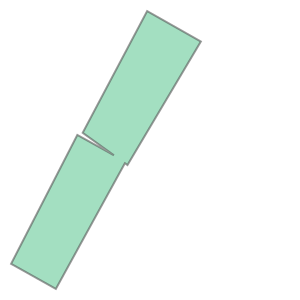

In [7]:
geom_union = geom1.union(geom2)
geom_union.as_arcpy

#### a2. Difference

The second method to be introduced here, `difference(second_geometry)`, constructs the geometry that is composed only of the region unique to the base geometry but not part of the other geometry. The following illustration shows the results that are inside the source geometry, but not the second geometry.

In [8]:
geom3_json = {'spatialReference': {'latestWkid': 3857, 'wkid': 102100}, 'rings': [[[-8233020.380435019, 4978303.121194171], [-8232303.783294846, 4979640.769189159], [-8232026.699067313, 4979497.449761124], [-8232791.069350163, 4978112.028623458], [-8233020.380435019, 4978303.121194171]]]}

In [9]:
geom3 = Geometry(geom3_json)

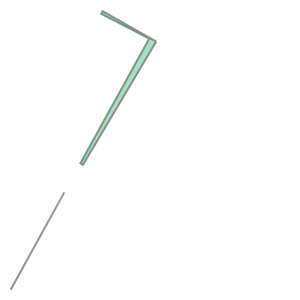

In [10]:
geom_diff = geom_union.difference(geom3)
geom_diff.as_arcpy

#### a3. Symmetric difference

Similar to `difference()` but not identical in essence, the method `symmetric_difference(second_geometry)` constructs the geometry that is the union of two geometries minus the instersection of those geometries. As told by the definition, the result of `difference()` should always be included/contained in the result of a `symmetric_difference()`.

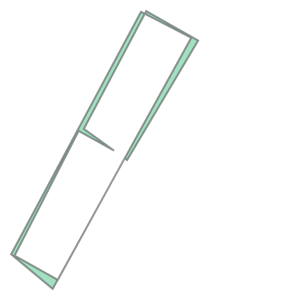

In [11]:
geom_sdiff = geom_union.symmetric_difference(geom3)
geom_sdiff.as_arcpy

#### a4. intersect() V.S. overlaps()

The `intersect()` constructs a geometry that is the geometric intersection of the two input geometries. Different dimension values can be used to create different shape types. The intersection of two geometries of the same shape type is a geometry containing only the regions of overlap between the original geometries, and its arguments include:
  - `second_geometry`: required `arcgis.geometry.Geometry`. 
  - A second geometry `dimension`: required Integer. The topological dimension (shape type) of the resulting geometry, which can be:
    - 1: A zero-dimensional geometry (point or multipoint).
    - 2: A one-dimensional geometry (polyline).
    - 4: A two-dimensional geometry (polygon).

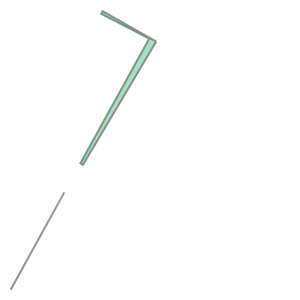

In [12]:
geom_intersection = geom_sdiff.intersect(second_geometry = geom_diff,
                                         dimension=4)
geom_intersection.as_arcpy

Different than `intersect()` returning a new geometry, the `overlaps()` will return a boolean value which indicates if the intersection of the two geometries has the same shape type as one of the input geometries and is not equivalent to either of the input geometries.

According to the definition, we can tell that `overlaps()` contains two operations - first, it creates the interection of first and second geometries; second, it checks if the intersection is None, or it being equivalent to either the first or the second geometry - if so, then overlaps() returns `False`, or else, returns `True`.

In [13]:
# False, because the intersection of geom1 and geom_union is geom1, and that is equivalent to the first geometry
geom1.overlaps(geom_union)

False

In [14]:
# True, because the intersection of geom1 and geom_intersection is partial shape of geom_intersection, and is not
# equivalent to either one
geom1.overlaps(geom_intersection)

True

#### a5. Equals

The boolean value returned from `equals()` indicates if the base and comparison geometries are of the same shape type and define the same set of points in the plane. This is a `2D comparison` only; M and Z values are ignored.

In [15]:
geom_intersection.equals(geom_diff)

True

In [16]:
geom_intersection.equals(geom_sdiff)

False

#### a6. generalize() V.S. buffer()

Next, you will see the difference between these two spatial operations:
  - `generalize(max_offset)` - Creates a new simplified geometry using a specified maximum offset tolerance (as shown in Figs 1 and 2). The result of the `generalize()` operation against a polyline object is a new polyline, while that against a polygon object is a new polygon.
  - `buffer(distance)` - Constructs a polygon at a specified distance from the geometry. The buffering process merges buffer polygons that overlap. Negative distances greater than one-half the maximum interior width of a polygon result in an empty geometry. Illustration of `buffer()` operations against different geomtry types can be found in Fig 3, which also shows that results of `buffer()` are always polygon objects.

<img src="https://desktop.arcgis.com/en/arcmap/10.3/tools/editing-toolbox/GUID-BA4E50F7-938B-4695-9E96-B9C3B7B96365-web.gif"  />
<b><center>Fig 1. Generialize operation against a polyline object (Source: <a href="https://desktop.arcgis.com/en/arcmap/10.3/tools/editing-toolbox/generalize.htm">ArcMap Toolbox Help</a>)</center></b>
  
<img src="https://desktop.arcgis.com/en/arcmap/latest/tools/cartography-toolbox/GUID-128637E4-C21F-436E-9D37-62741C3B9E93-web.png"  />
<b><center>Fig 2. Generialize operation against a polygon object (Source: <a href="https://desktop.arcgis.com/en/arcmap/latest/tools/cartography-toolbox/simplify-polygon.htm">ArcMap Toolset Help</a>)</center><b>
  
<img src="http://webhelp.esri.com/arcgisdesktop/9.2/published_images/ST_Buffer.gif" />
<b><center>Fig 3. Buffer operation (Source: <a href="http://webhelp.esri.com/arcgisdesktop/9.2/index.cfm?TopicName=Spatial_operations">ArcGIS Desktop Help</a>)</center></b>

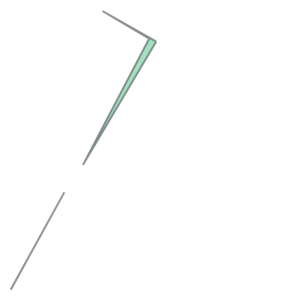

In [17]:
geom_generalized = geom_diff.generalize(max_offset=50)
geom_generalized.as_arcpy

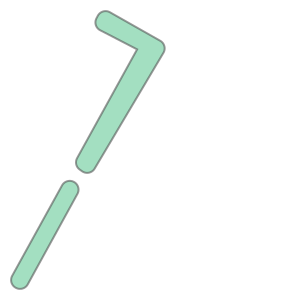

In [18]:
geom_buffered = geom_diff.buffer(distance=50)
geom_buffered.as_arcpy

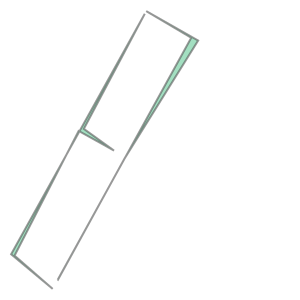

In [19]:
geom_generalized2 = geom_sdiff.generalize(max_offset=100)
geom_generalized2.as_arcpy

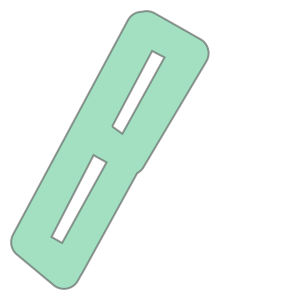

In [20]:
geom_buffered2 = geom_sdiff.buffer(distance=100)
geom_buffered2.as_arcpy

#### a7. Find the nearest point

Imagine that you are jogging on the trail (drawn as the light blue line segment on the map) inside Central Park, and looking for a fountain for water, now given the information that the fountain is located inside the pavilion (as marked as the blue pin), is there a way to decide from which point should you leave the trail for the pavilion, and the route will be the shorted?

The method `query_point_and_distance(second_geometry, use_percentage=False)` can be used to find the point on the polyline nearest to the in_point and the distance between those points, and return information about the side of the line the in_point is on as well as the distance along the line where the nearest point occurs.

In [21]:
access_point = Point({'spatialReference': {'latestWkid': 3857, 'wkid': 102100}, 'x': -8234818.501757936, 'y': 4978337.398475052})

In [22]:
access_polyline = Polyline({'spatialReference': {'latestWkid': 3857, 'wkid': 102100}, 
                            'paths': [[[-8234920.019686119, 4978251.645698531], [-8234885.38415768, 4978242.091069995], 
                                       [-8234849.554300674, 4978245.674055696], [-8234808.947129401, 4978255.228684231],
                                       [-8234773.117272396, 4978251.645698531], [-8234751.619358192, 4978239.702412861],
                                       [-8234736.093086823, 4978215.815841525]]]})


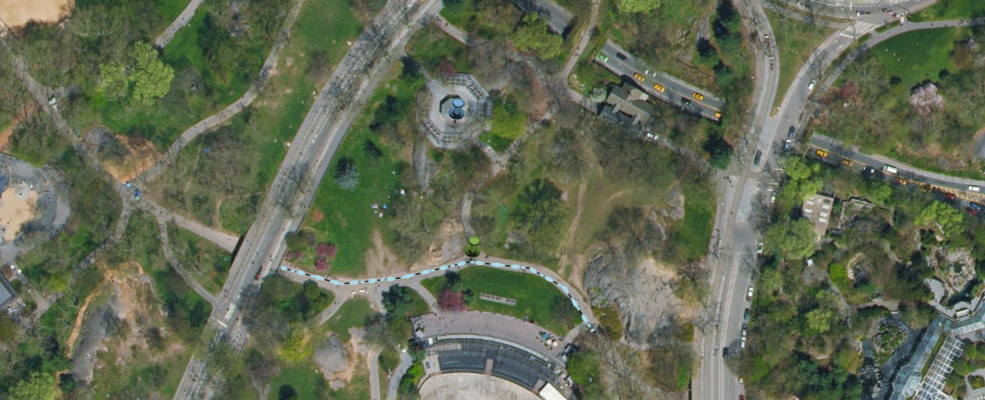

In [92]:
map1 = gis.map()
map1.basemap = "satellite"
map1

In [81]:
map1.height= "650px"

location = geocode("Central Park, New York")[0]
map1.extent = location['extent']

In [91]:
map1.draw(access_polyline,
          symbol = {
                      "type": "simple-line",
                      "color": "lightblue",
                      "width": "4px",
                      "style": "short-dot"
                    })

In [83]:
map1.draw(access_point, 
          symbol = {"angle":0,"xoffset":2,"yoffset":8,"type":"esriPMS",
                    "url":"http://static.arcgis.com/images/Symbols/Basic/BlueShinyPin.png",
                    "contentType":"image/png","width":24,"height":24})

Now let us use `query_point_and_distance(second_geometry, use_percentage=False)` to find the point on the polyline nearest to the in_point and the distance between those points, and the returned `acces_res` contains the PointGeometry object for the nearest point, and the x-, and y-coridnates of this point.

In [23]:
access_res = access_polyline.query_point_and_distance(access_point)
access_res

(<PointGeometry object at 0xc1ad93ae80[0xc1ada249e0]>,
 113.65391060742849,
 82.72342745570265,
 False)

In [24]:
access_res[0].type

'point'

In [25]:
access_res[0].JSON

'{"x":-8234808.9471294014,"y":4978255.2286842307,"spatialReference":{"wkid":102100,"latestWkid":3857}}'

With the information we can now draw the nearest point on the map view as well, with the selected symbology (which is the green pin marker).

In [26]:
a_p = Point({"x":-8234808.9471294014,"y":4978255.2286842307,"spatialReference":{"wkid":102100,"latestWkid":3857}})

In [88]:
map1.draw(a_p, 
          symbol = {"angle":0,"xoffset":2,"yoffset":8,"type":"esriPMS",
                    "url":"http://static.arcgis.com/images/Symbols/Basic/GreenShinyPin.png",
                    "contentType":"image/png","width":24,"height":24})

#### a8. contains()

The method `contains(second_geometry, relation=None)` indicates if the base geometry contains the comparison geometry.

In [27]:
access_polyline.contains(a_p)

True

In which an optional paramter `relation` can be used to specify the spatial relationship type.
  - `BOUNDARY` - Relationship has no restrictions for interiors or boundaries.
  - `CLEMENTINI` - Interiors of geometries must intersect. Specifying CLEMENTINI is equivalent to specifying None. This is the default.
  - `PROPER` - Boundaries of geometries must not intersect.

In [29]:
access_polyline.contains(a_p, relation = "PROPER")

True

In [30]:
access_polygon = Polygon({'spatialReference': {'latestWkid': 3857, 'wkid': 102100}, 
                          'rings': [[[-8234920.019686119, 4978251.645698531], [-8234885.38415768, 4978242.091069995], 
                                     [-8234849.554300674, 4978245.674055696], [-8234808.947129401, 4978255.228684231],
                                     [-8234773.117272396, 4978251.645698531], [-8234751.619358192, 4978239.702412861],
                                     [-8234736.093086823, 4978215.815841525], [-8234663.657066563, 4978349.222320599], 
                                     [-8234737.705437716, 4978225.012149632], [-8234935.963979837, 4978263.2306637755]]]})

In [31]:
access_polygon.contains(access_polyline)

True

In [32]:
access_polygon.contains(access_polyline, relation = "BOUNDARY")

True

#### a9. Clip a geometry object

The method `clip(envelope)` constructs the intersection of the geometry and the specified extent. Note that, if `ArcPy` is not installed, none is returned. The one and required input parameter is,
  - `envelope`: required tuple. The tuple must have (XMin, YMin, XMax, YMax) each value represents the lower left bound and upper right bound of the extent.

In [34]:
# (XMin, YMin, XMax, YMax) 
x = access_polygon.centroid[0]
y = access_polygon.centroid[1]
envelope_tuple = (x-10, y-10, x+10, y+10)

In [35]:
clipped = access_polygon.clip(envelope_tuple)
clipped.JSON

'{"rings":[[[-8234799.2935000006,4978254.2633346096],[-8234779.2935000006,4978252.2633234477],[-8234779.2935000006,4978238.3421204891],[-8234799.2935000006,4978238.3421204891],[-8234799.2935000006,4978254.2633346096]]],"spatialReference":{"wkid":102100,"latestWkid":3857}}'

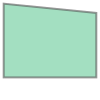

In [36]:
clipped.as_arcpy

You can find the source geometry (dark shaded polygon) and the clipped geometry (the contained polygon with white diagnoal crosses) in the map below:


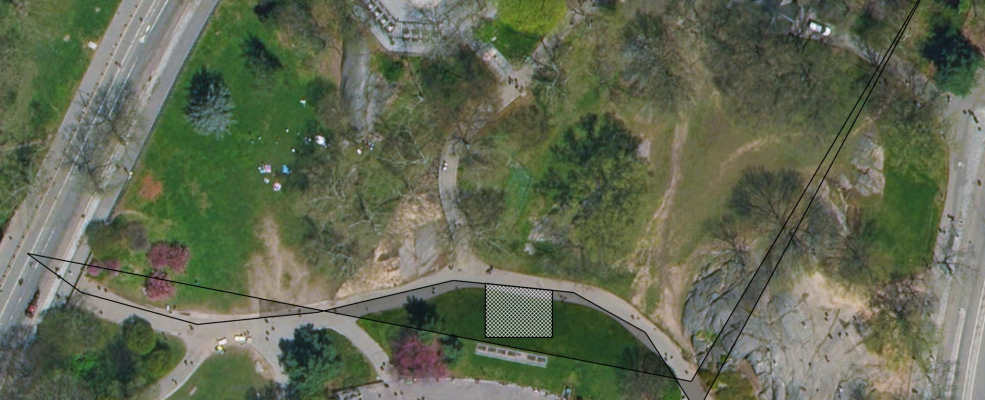

In [43]:
map2 = gis.map()
map2.basemap = "satellite"
map2

In [38]:
map2.height= "650px"

location = geocode("Central Park, New York")[0]
map2.extent = location['extent']

In [39]:
map2.draw(access_polygon)

In [42]:
map2.draw(clipped,
          symbol = {
                      "type" : "esriSFS",
                      "style" : "esriSFSDiagonalCross",
                      "outline" : "blue",
                      "color": "lightblue"
                    })

Up till this point, you have tried creating geometry objects and performed spatial operations such as `union` and `intersect`, from the built-in methods of these geometry objects. Next, let us explore the other way in performing spatial operations.


### b. Spatial operations called from `arcgis.geometry.functions`

Besides calling methods off the geometry object as discussed in section (a), users can also call spatial operations directly from `arcgis.geometry.functions`. In the following section, you will see spatial operations such as `union` and `intersect` being performed with global functions.

In [ ]:
from arcgis.geometry import union, intersect, difference, generalize, buffer, relation

#### b1. Union

Compared to what is used in section (a1) in performing `union` operation (a.k.a. `geom_union = geom1.union(geom2)`), calling the `union()` method directly on a geometry resource service would require these input parameters:
  - `spatial_ref` - The well-known ID of the spatial reference or a spatial reference json object.
  - `geometries` - The array of geometries to be unioned.
  - `gis` - The active GIS instance.

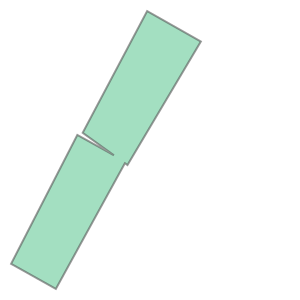

In [48]:
geom_union_b = union(spatial_ref={"wkid":102100,"latestWkid":3857},
                     geometries = [geom1, geom2],
                     gis = gis)
geom_union_b.as_arcpy

#### b2. intersect() V.S. overlaps()

The intersect function `arcgis.geometry.intersect(spatial_ref, geometries, geometry, gis=None)` is performed on a geometry service resource. This function constructs the set-theoretic intersection between an array of geometries and another geometry. The dimension of each resultant geometry is the minimum dimension of the input geometry in the geometries array and the other geometry specified by the geometry parameter. Inputs include:
  - `spatial_ref` - The well-known ID or a spatial reference JSON object for the input geometries.
  - `geometries` - An array of points, multipoints, polylines, or polygons. The structure of each geometry in the array is the same as the structure of the JSON geometry objects returned by the ArcGIS REST API.
  - `geometry` - A single geometry of any type with a dimension equal to or greater than the elements of geometries.

Let's see how it compares to what we used in section (a4) - `geom_intersection = geom_sdiff.intersect(second_geometry = geom_diff, dimension=4)`:

In [49]:
geom_intersection_b = intersect(spatial_ref={"wkid":102100,"latestWkid":3857}, 
                                geometries=[geom_sdiff], 
                                geometry=geom_diff, 
                                gis=gis)
geom_intersection_b

[{'rings': [[[-8231988.480599999, 4979482.162299998],
    [-8232380.2203, 4978822.8928999975],
    [-8232393.5666000005, 4978832.502300002],
    [-8232026.699100001, 4979497.4498],
    [-8232282.8696, 4979629.951800004],
    [-8232275.1194, 4979644.590999998],
    [-8231988.480599999, 4979482.162299998]],
   [[-8232479.2171, 4978677.260799997],
    [-8232762.4055, 4978161.712800004],
    [-8232763.3619, 4978162.248400003],
    [-8232479.2171, 4978677.260799997]]]}]

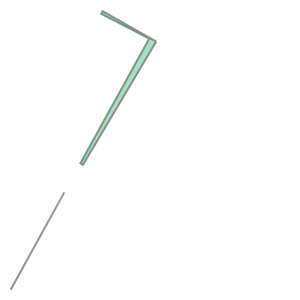

In [50]:
geom_intersection_b[0].as_arcpy

Unlike what's stated in section (a4) that a simple `first_geometry.overlaps(second_geometry)` is just sufficient to perform an overalapping operation which then returns a boolean value which indicates if the intersection of the two geometries has the same shape type as one of the input geometries and is not equivalent to either of the input geometries, there is no direct match of `overlaps` function in the `arcgis.geometry.functions`.

However, we can write our own function as in `my_overlap` in situations when OOP pattern is not applicable, and it includes two operations - first, it creates the interection of first and second geometries; second, it checks if the intersection is None, or it being equivalent to either the first or the second geometry - if so, then overlaps() returns `False`, or else, returns `True`.

In [51]:
def my_overlap(spatial_ref, geometry1, geometry2, gis):
    intersection = intersect(spatial_ref, 
                             geometries=[geometry1], 
                             geometry=geometry2, 
                             gis=gis)
    if intersection is None:
        return False
    elif intersection[0].equals(geometry1) or intersection[0].equals(geometry2):
        return False
    else:
        return True

In [52]:
# False, because the intersection of geom1 and geom_union is geom1, and that is equivalent to the first geometry
my_overlap(3857, geom1, geom_union, gis)

False

In [53]:
# True, because the intersection of geom1 and geom_intersection is partial shape of geom_intersection, and is not
# equivalent to either one
my_overlap(3857, geom1, geom_intersection, gis)

True

#### b3. Difference

In order to construct the set-theoretic difference between each element of an array of geometries and another geometry (a.k.a. the so-called difference geometry), users need to perform a `difference` function on a geomtry service resource, which requires these inputs:
 - `geometries` - An array of points, multipoints, polylines or polygons. The structure of each geometry in the array is the same as the structure of the JSON geometry objects returned by the ArcGIS REST API.
 - `spatial_ref` - The well-known ID of the spatial reference or a spatial reference JSON object for the input geometries.
  - `geometry` - A single geometry of any type and of a dimension equal to or greater than the elements of geometries. The structure of geometry is the same as the structure of the JSON geometry objects returned by the ArcGIS REST API. The use of simple syntax is not supported.
    
In other words, when performing `arcgis.geometry.difference(geometries=[A1, A2, ..., AN], spatial_ref, geometry=B, gis=None)`, let B be the difference geometry. For each geometry in [A1, A2, ..., AN], in the input geometry array, it constructs a new geometry `An-B` (that n is numbered from 1 to N).

In [54]:
geom_diff_b = difference(geometries=[geom1, geom2, geom_union], 
                         spatial_ref=3857, 
                         geometry=geom3, 
                         gis=gis)
geom_diff_b

[{'rings': [[[-8232479.221100001, 4978677.253700003],
    [-8232762.4055, 4978161.712800004],
    [-8232763.3619, 4978162.248400003],
    [-8232479.221100001, 4978677.253700003]]]},
 {'rings': [[[-8231988.480599999, 4979482.162299998],
    [-8232380.2203, 4978822.8928999975],
    [-8232393.5667, 4978832.502300002],
    [-8232026.699100001, 4979497.4498],
    [-8232282.8696, 4979629.951800004],
    [-8232275.1194, 4979644.590999998],
    [-8231988.480599999, 4979482.162299998]]]},
 {'rings': [[[-8231988.480599999, 4979482.162299998],
    [-8232380.2203, 4978822.8928999975],
    [-8232393.5666000005, 4978832.502300002],
    [-8232026.699100001, 4979497.4498],
    [-8232282.8696, 4979629.951800004],
    [-8232275.1194, 4979644.590999998],
    [-8231988.480599999, 4979482.162299998]],
   [[-8232479.2171, 4978677.260799997],
    [-8232762.4055, 4978161.712800004],
    [-8232763.3619, 4978162.248400003],
    [-8232479.2171, 4978677.260799997]]]}]

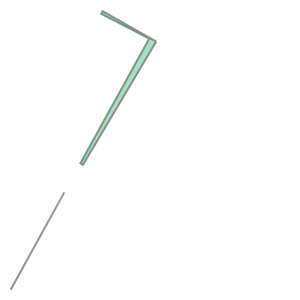

In [55]:
geom_diff_b[2].as_arcpy

In [56]:
""" Compared to geom_diff derived from `geom_diff = geom_union.difference(geom3)`
"""
geom_diff_b[2].equals(geom_diff)

True

#### b4. Symmetric difference

Again there is no direct match of `symmetric_difference` function in the `arcgis.geometry.functions`. In situations when OOP pattern of this call is not applicable, you can construct your own customized function that creates the geometry which is the union of two geometries minus the instersection of those geometries.

In [60]:
def my_symmetric_difference(spatial_ref, geometry1, geometry2, gis):
    union_b = union(spatial_ref,
                    geometries = [geometry1, geometry2],
                    gis = gis)
    intersect_b = intersect(spatial_ref, 
                            geometries=[geometry1], 
                            geometry=geometry2, 
                            gis=gis)
    symm_diff_b = difference(geometries=[union_b], 
                             spatial_ref=spatial_ref, 
                             geometry=intersect_b[0], 
                             gis=gis)
    return symm_diff_b[0]

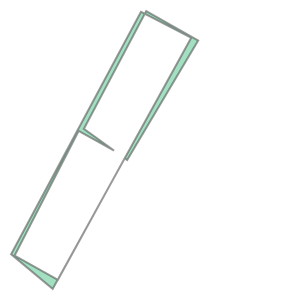

In [61]:
geom_sdiff_b = my_symmetric_difference(3857, geom_union, geom3, gis)
geom_sdiff_b.as_arcpy

In [62]:
geom_sdiff_b.equals(geom_sdiff)

True

#### b5. Equals

Likewise there is no direct match of `equals()` function in the `arcgis.geometry.functions`. In situations when OOP pattern of this call is not applicable, you can construct your own customized function that checks if two geometries are equal.

In [80]:
def my_equals(spatial_ref, geometry1, geometry2, gis):
    def my_1direction_diff(spatial_ref, geom1, geom2, gis):
        diff_b = difference(geometries=[geom1], 
                            spatial_ref=spatial_ref, 
                            geometry=geom2, 
                            gis=gis)
        # print(diff_b[0])
        if diff_b[0] is None:
            return True
        elif "rings" in diff_b[0] and len(diff_b[0]["rings"])==0:
            return True
        else:
            return False
    
    if geom1.type == geom2.type:
        res1 = my_1direction_diff(spatial_ref, geometry1, geometry2, gis)  
        res2 = my_1direction_diff(spatial_ref, geometry2, geometry1, gis)  
        return res1 and res2
    else:
        return False

In [81]:
# Compared to "geom_intersection.equals(geom_diff)"
my_equals(3857, geom_intersection, geom_diff, gis)

True

In [82]:
# Compared to "geom_intersection.equals(geom_sdiff)"
my_equals(3857, geom_sdiff, geom_intersection, gis)

False

#### b6. generalize() V.S. buffer()

In section (a6), we have already discussed the difference between these two spatial operations:
  - `generalize(max_offset)` - Creates a new simplified geometry using a specified maximum offset tolerance.
  - `buffer(distance)` - Constructs a polygon at a specified distance from the geometry.

Now let us explore how these two spatial operations can be done with non-OOP style.

The global method `arcgis.geometry.generalize(spatial_ref, geometries, max_deviation, deviation_unit, gis=None)` is performed on a geometry service resource. The generalize function simplifies the input geometries using the `Douglas-Peucker algorithm` with a specified `maximum deviation distance`. The output geometries will contain a subset of the original input vertices.

One of the input parameters, the `deviation_unit` represents the unit for maximum deviation. If a unit is not specified, the units are derived from `spatial_ref`. For a list of valid units, see <a href="http://resources.arcgis.com/en/help/arcobjects-cpp/componenthelp/index.html#//000w00000042000000">esriSRUnitType Constants</a>. `9001` here means `Meters`. 

In [86]:
geom_generalized_b = generalize(spatial_ref={"wkid":102100,"latestWkid":3857},
                                geometries=[geom_diff],
                                max_deviation=50,
                                deviation_unit="9001",
                                gis=gis)
geom_generalized_b

[{'rings': [[[-8231988.480599999, 4979482.162299998],
    [-8232380.2203, 4978822.8928999975],
    [-8232026.699100001, 4979497.4498],
    [-8232275.1194, 4979644.590999998],
    [-8231988.480599999, 4979482.162299998]],
   [[-8232479.2171, 4978677.260799997],
    [-8232762.4055, 4978161.712800004],
    [-8232763.3619, 4978162.248400003],
    [-8232479.2171, 4978677.260799997]]]}]

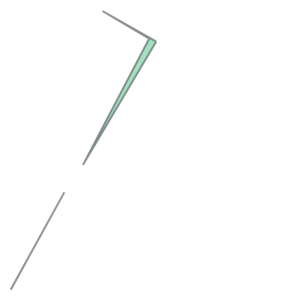

In [87]:
geom_generalized_b[0].as_arcpy

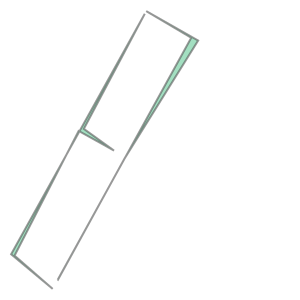

In [92]:
geom_generalized2_b = generalize(spatial_ref={"wkid":102100,"latestWkid":3857},
                                 geometries=[geom_sdiff],
                                 max_deviation=100,
                                 deviation_unit="9001",
                                 gis=gis)
geom_generalized2_b[0].as_arcpy

The buffer function `arcgis.geometry.buffer(geometries, in_sr, distances, unit, out_sr=None, buffer_sr=None, union_results=None, geodesic=None, gis=None)` is performed on a geometry service resource The result of this function is buffered polygons at the specified distances for the input geometry array. Options are available to union buffers and to use geodesic distance:
  - `union_results` - If True, all geometries buffered at a given distance are unioned into a single (gis,possibly multipart) polygon, and the unioned geometry is placed in the output array. The default is False.
  - `geodesic` - Set geodesic to True to buffer the input geometries using geodesic distance. Geodesic distance is the shortest path between two points along the ellipsoid of the earth. If geodesic is set to False, the 2D Euclidean distance is used to buffer the input geometries. The default value depends on the geometry type, unit and buffer_SR.

In [88]:
geom_buffered_b = buffer(geometries = [geom_diff], 
                         in_sr=3857, 
                         distances=50, 
                         unit="9001", 
                         out_sr=None, 
                         buffer_sr=None, 
                         union_results=None, 
                         geodesic=None, 
                         gis=gis)

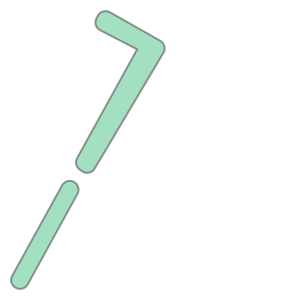

In [90]:
geom_buffered_b[0].as_arcpy

In [95]:
geom_buffered2_b = buffer(geometries = [geom_sdiff], 
                          in_sr=3857, 
                          distances=100, 
                          unit="9001", 
                          out_sr=None, 
                          buffer_sr=None, 
                          union_results=None, 
                          geodesic=None, 
                          gis=gis)

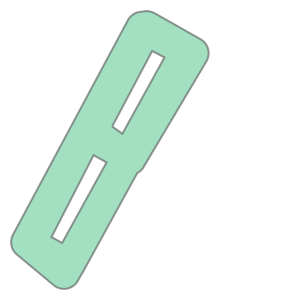

In [96]:
geom_buffered2_b[0].as_arcpy

#### b7. Distance

From section (a7) we have figured out that `a_p` is the closest point on the trail from the pavilion, is there a way to confirm that the distance from `a_p` to the `access_point` is in fact the shortest?

The distance function `arcgis.geometry.distance(spatial_ref, geometry1, geometry2, distance_unit='', geodesic=False, gis=None)` is performed on a geometry service resource. It reports the 2D Euclidean or geodesic distance between the two geometries. We can take advantage of the `distance()` method in validation.

In [102]:
from arcgis.geometry import distance
radius = distance(   spatial_ref=3857, 
                     geometry1=access_point, 
                     geometry2=a_p, 
                     distance_unit='9001', 
                     geodesic=False, 
                     gis=gis)
radius['distance']

82.72342745570265

In [122]:
access_point_buffer = buffer( geometries = [access_point], 
                              in_sr=3857, 
                              distances=radius['distance'], 
                              unit="9001", 
                              out_sr=3857, 
                              buffer_sr=3857, 
                              union_results=None, 
                              geodesic=None, 
                              gis=gis)

In [125]:
access_point_buffer[0].spatialReference = {"wkid":102100,"latestWkid":3857}


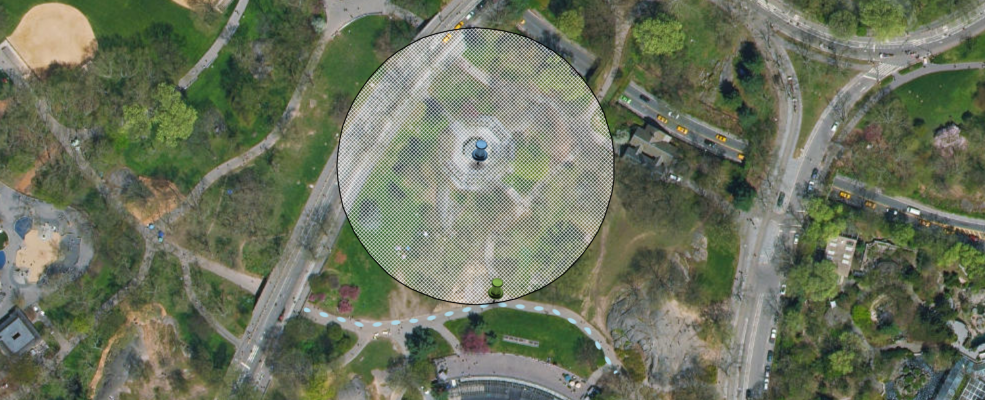

In [136]:
map3 = gis.map()
map3.basemap = "satellite"
map3

In [129]:
map3.height= "650px"

location = geocode("Central Park, New York")[0]
map3.extent = location['extent']

In [130]:
map3.draw(access_polyline,
          symbol = {
                      "type": "simple-line",
                      "color": "lightblue",
                      "width": "4px",
                      "style": "short-dot"
                    })

In [132]:
map3.draw(access_point_buffer[0],
          symbol = {
                      "type" : "esriSFS",
                      "style" : "esriSFSDiagonalCross",
                      "outline" : "blue",
                      "color": "lightblue"
                    })

In [134]:
map3.draw(access_point, 
          symbol = {"angle":0,"xoffset":2,"yoffset":8,"type":"esriPMS",
                    "url":"http://static.arcgis.com/images/Symbols/Basic/BlueShinyPin.png",
                    "contentType":"image/png","width":24,"height":24})

In [133]:
map3.draw(a_p, 
          symbol = {"angle":0,"xoffset":2,"yoffset":8,"type":"esriPMS",
                    "url":"http://static.arcgis.com/images/Symbols/Basic/GreenShinyPin.png",
                    "contentType":"image/png","width":24,"height":24})

It is obvious that the buffer created only intersects with the `access_polyline` at one point - `a_p`, hence we can validate that the shortest path from trail to pavilion is to leave at `a_p`, which well corresponds to the results seen in section (a7).

#### b8. Determine the spatial relation between two geometries

The relation function `arcgis.geometry.relation(geometries1, geometries2, spatial_ref, spatial_relation='esriGeometryRelationIntersection', relation_param='', gis=None)` is performed on a geometry service resource. This function determines the pairs of geometries from the input geometry arrays that participate in the specified spatial relation. Both arrays are assumed to be in the spatial reference specified by `spatial_ref`, which is a required parameter. Geometry types cannot be mixed within an array. The relations are evaluated in 2D. In other words, z coordinates are not used.

The spatial relationship to be tested between the two input geometry arrays is defined by `spatial_relation`, and can be chosen from these values: `esriGeometryRelationCross | esriGeometryRelationDisjoint | esriGeometryRelationIn | esriGeometryRelationInteriorIntersection | esriGeometryRelationIntersection | esriGeometryRelationLineCoincidence | esriGeometryRelationLineTouch | esriGeometryRelationOverlap | esriGeometryRelationPointTouch | esriGeometryRelationTouch | esriGeometryRelationWithin | esriGeometryRelationRelation`.

Take the Point Geometry `a_p` and Polyline Geometry `access_polyline` created previously for example, let us explore if the specified spatial relation exists between the input geometry arrays. Here, `a_p` is on the `access_polyline`.

In [141]:
"""esriSpatialRelationIn is the same as IRelationalOperator::Within. esriSpatialRelationWithin also allows polylines 
that are strictly on the boundaries of polygons to be considered “in” the polygon. This case is disallowed by the former
relation (and disallowed by IRelationalOperator::Within). 
"""
relation([a_p], [access_polyline],
         spatial_ref={'spatialReference': {'latestWkid': 3857, 'wkid': 102100}},
         spatial_relation="esriGeometryRelationWithin",
         gis = gis)

{'relations': [{'geometry1Index': 0, 'geometry2Index': 0}]}

In [142]:
relation([a_p], [access_polyline],
         spatial_ref={'spatialReference': {'latestWkid': 3857, 'wkid': 102100}},
         spatial_relation="esriGeometryRelationIn",
         gis = gis)

{'relations': [{'geometry1Index': 0, 'geometry2Index': 0}]}

In [146]:
"""`esriGeometryRelationInteriorIntersection` same as esriSpatialRelationIntersection, but excludes intersections that 
occur only at boundaries (two touching polygons for example). The interior of a point is considered to be the point 
itself and the interior of a polyline excludes the endpoints of all its parts.
"""
relation([a_p], [access_polyline],
         spatial_ref={'spatialReference': {'latestWkid': 3857, 'wkid': 102100}},
         spatial_relation="esriGeometryRelationIntersection",
         gis = gis)

{'relations': [{'geometry1Index': 0, 'geometry2Index': 0}]}

In [143]:
relation([a_p], [access_polyline],
         spatial_ref={'spatialReference': {'latestWkid': 3857, 'wkid': 102100}},
         spatial_relation="esriGeometryRelationInteriorIntersection",
         gis = gis)

{'relations': [{'geometry1Index': 0, 'geometry2Index': 0}]}

In [145]:
"""esriSpatialRelationPointTouch and esriSpatialRelationLineTouch are boundary intersectionsclassified by dimension of 
intersection. esriSpatialRelationTouch is the union of those two and is equivalent to the ArcObjects IRelationalOperator
Touch method.
"""
relation([a_p], [access_polyline],
         spatial_ref={'spatialReference': {'latestWkid': 3857, 'wkid': 102100}},
         spatial_relation="esriGeometryRelationPointTouch",
         gis = gis)

{'relations': []}

The difference of `esriGeometryRelationWithin` and `esriGeometryRelationIn`, and that of `esriGeometryRelationIntersection` and `esriGeometryRelationInteriorIntersection` are not as significant in the previous example. Next, let us look at a different use case of `access_polyline` and `access_polygon` that the former is overlappig with partial edges of the latter.

In [147]:
"""esriSpatialRelationIn is the same as IRelationalOperator::Within. esriSpatialRelationWithin also allows polylines 
that are strictly on the boundaries of polygons to be considered “in” the polygon. This case is disallowed by the former
relation (and disallowed by IRelationalOperator::Within). 
"""
relation([access_polyline], [access_polygon],
         spatial_ref={'spatialReference': {'latestWkid': 3857, 'wkid': 102100}},
         spatial_relation="esriGeometryRelationWithin",
         gis = gis)

{'relations': [{'geometry1Index': 0, 'geometry2Index': 0}]}

In [148]:
relation([access_polyline], [access_polygon],
         spatial_ref={'spatialReference': {'latestWkid': 3857, 'wkid': 102100}},
         spatial_relation="esriGeometryRelationIn",
         gis = gis)

{'relations': []}

In [149]:
"""`esriGeometryRelationInteriorIntersection` same as esriSpatialRelationIntersection, but excludes intersections that 
occur only at boundaries (two touching polygons for example). The interior of a point is considered to be the point 
itself and the interior of a polyline excludes the endpoints of all its parts.
"""
relation([access_polyline], [access_polygon],
         spatial_ref={'spatialReference': {'latestWkid': 3857, 'wkid': 102100}},
         spatial_relation="esriGeometryRelationIntersection",
         gis = gis)

{'relations': [{'geometry1Index': 0, 'geometry2Index': 0}]}

In [150]:
relation([access_polyline], [access_polygon],
         spatial_ref={'spatialReference': {'latestWkid': 3857, 'wkid': 102100}},
         spatial_relation="esriGeometryRelationInteriorIntersection",
         gis = gis)

{'relations': []}

In [152]:
"""esriSpatialRelationPointTouch and esriSpatialRelationLineTouch are boundary intersectionsclassified by dimension of 
intersection. esriSpatialRelationTouch is the union of those two and is equivalent to the ArcObjects IRelationalOperator
Touch method.
"""
relation([access_polyline], [access_polygon],
         spatial_ref={'spatialReference': {'latestWkid': 3857, 'wkid': 102100}},
         spatial_relation="esriGeometryRelationLineTouch",
         gis = gis)

{'relations': [{'geometry1Index': 0, 'geometry2Index': 0}]}

As shown above, though `access_polyline` is considered to be `esriGeometryRelationWithin` inside `access_polygon`, but it is not `esriGeometryRelationIn` inside `access_polygon`. Similarly, `access_polyline` is `esriGeometryRelationIntersection` intersecting with `access_polygon`, but not `esriGeometryRelationInteriorIntersection`.

#### b9. Clip a geometry object

There is no direct match in the `arcgis.geometry.functions` that is equivalent to `clips()`, but we can take advantage of `intersect()` and write our own customized function that creates the `envelope` object to clip with, and performs `intersect()` with source geometry to generate the equivalent clipped result.

In [157]:
def my_clip(spatial_ref, geometry1, envelope_tuple, gis):
    x_min, y_min, x_max, y_max = envelope_tuple
    envelope_json = {"rings":[[[x_min,y_min],[x_min,y_max],
                               [x_max,y_max],[x_max,y_min],
                               [x_min,y_min]]],
                     "spatialReference":spatial_ref}
    geom_intersection_b = intersect(spatial_ref=spatial_ref, 
                                    geometries=[geometry1], 
                                    geometry=Polygon(envelope_json), 
                                    gis=gis)
    return geom_intersection_b[0]

In [158]:
clipped_b = my_clip(spatial_ref={"wkid":102100,"latestWkid":3857},
                    geometry1=access_polygon,
                    envelope_tuple=envelope_tuple,
                    gis=gis
                   )

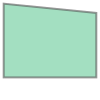

In [159]:
clipped_b.as_arcpy

You can find the source geometry (dark shaded polygon) and the clipped geometry (the contained polygon with white diagnoal crosses) in the map below:


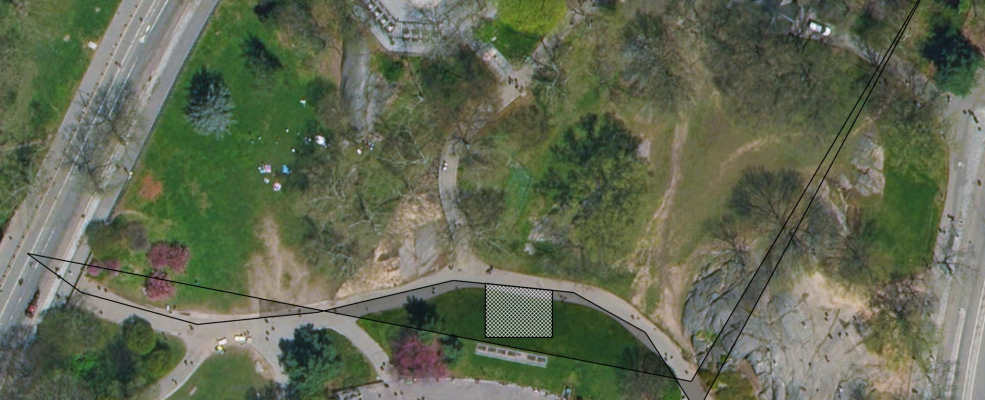

In [43]:
map4 = gis.map()
map4.basemap = "satellite"
map4

In [38]:
map4.height= "650px"

location = geocode("Central Park, New York")[0]
map4.extent = location['extent']

In [39]:
map4.draw(access_polygon)

In [42]:
map4.draw(clipped_b,
          symbol = {
                      "type" : "esriSFS",
                      "style" : "esriSFSDiagonalCross",
                      "outline" : "blue",
                      "color": "lightblue"
                    })

## Conclusions

Up to this point, we have finished exloring the two approaches of spatial operations - (a) Object Oriented Programming (OOP) pattern - through creating an geometry object first, then calling methods off the geometry object, and (b) calling functions from arcgis.geometry.functions directly without initating any geometry objects, which takes spatial data as input, analyzes the data, then produces output data that is the derivative of the analysis performed on the input data.

In most cases, approach (a) is simplier and more staight forward, and is more recommended for users getting to use the ArcGIS API for Python. Also, another advantage of (a) is that it does not consume credits and is performant for larger datasets. However, (a) uses local geom engines such as shapely or arcpy, in situations that there is no shapely or arcpy installed on the execution environment, approach (b) is the alternative, since calling from functions will send geometries over to server using geometry service, and does not require local geom engines.